 
# <center>Wish Summer Sales Prediction</center>
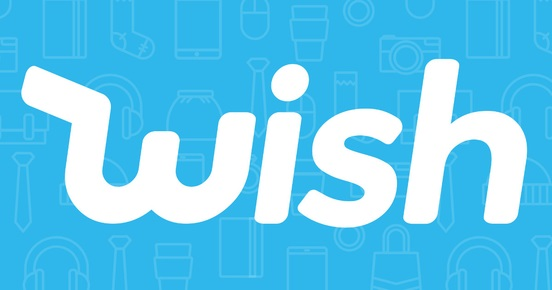
**Introduction**
 
Wish is an American online e-commerce platform which facilitates product transactions between sellers and buyers. This dataset is from Kaggle with information scraped from the Wish platform. The products listed in the dataset are those that would appear if we type “summer” in the search filed of the platform. 

This dataset contains 1573 rows and 43 columns with the columns containing information about product listing, product ratings, sales performance, etc. With all this information, I can explore correlations and patterns regarding the success of a product and the various components. For example, what features play an important role in affecting the sale of a product? Can we validate the established idea of human sensitiveness to price drops? Do products with bad ratings but feature a price drop sell? If they do, to what extent does the seller need to drop the price in order to attract buyers? Does product listing affect product sale? Are consumers attracted by certain words? What are the top categories of products that sells best? What’s the price range that is most attractive to buyers?

The dataset can be found here: [Wish database](https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish)

### Table of Contents
1. [Get the Data](#get_the_data)
2. [Data Cleaning](#data_cleaning)
3. [Exploratory Data Analysis](#eda)
4. [Modeling](#modeling)
  * [Linear Regression](#lr)
  * [Features Selection](#feature_selection)
      * [Backward Elimination](#back)
      * [Recursive Feature Elimination](#rfe)
      * [LassoCV](#lassocv)
  * [Linear Regression with Regularization](#lr_reg)
    * [Ridge Regression](#ridge)
    * [Lasso Regression](#lasso)
    * [Elastic Net](#en)
  * [K Nearest Neighbours](#knn)
  * [Decision Trees](#dt)
  * [Bagging](#bag)
  * [Random Forest](#rf)
  * [Boosting](#boosting)
    * [Ada Boosting](#ada)
    * [Gradient Boosting](#gradient)
    * [Xg Boost](#xg)
  * [Support Vector Machine Regression](#svr)
  * [Stacking Regressor](#stacking)
5. [Conlcusion](#con)

## Get the Data
<a id='get_the_data'></a>

In [1]:
import os
from os import getcwd
getcwd()
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\linli\\Desktop\\In progress project\\Wish')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
from plotly import graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
random_seed=748
random_state=random_seed

In [4]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

## Data Cleaning
<a id='data_cleaning'></a>

In [5]:
print(df.shape)

(1573, 43)


In [6]:
df.head(2)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress    8.0            22   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   

   rating_five_count  ...  merchant_rating_count  merchant_rating  \
0               26.0  ...                    568         4.128521   
1             2269.0  ...                  17752         3.899673   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   

   merchant_profile_picture                                      product_url  \
0                       NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                       NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08  

[2 rows x 43 columns]

In [7]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [8]:
df.describe()

price  retail_price     units_sold  uses_ad_boosts       rating  \
count  1573.000000   1573.000000    1573.000000     1573.000000  1573.000000   
mean      8.325372     23.288620    4339.005086        0.432931     3.820896   
std       3.932030     30.357863    9356.539302        0.495639     0.515374   
min       1.000000      1.000000       1.000000        0.000000     1.000000   
25%       5.810000      7.000000     100.000000        0.000000     3.550000   
50%       8.000000     10.000000    1000.000000        0.000000     3.850000   
75%      11.000000     26.000000    5000.000000        1.000000     4.110000   
max      49.000000    252.000000  100000.000000        1.000000     5.000000   

       rating_count  rating_five_count  rating_four_count  rating_three_count  \
count   1573.000000        1528.000000        1528.000000         1528.000000   
mean     889.659250         442.263743         179.599476          134.549738   
std     1983.928834         980.203270         400.516231          311.690656   
min        0.000000           0.000000           0.000000            0.000000   
25%       24.000000          12.000000           5.000000            4.000000   
50%      150.000000          79.000000          31.500000           24.000000   
75%      855.000000         413.500000         168.250000          129.250000   
max    20744.000000       11548.000000        4152.000000         3658.000000   

       rating_two_count  ...  badge_fast_shipping  \
count       1528.000000  ...          1573.000000   
mean          63.711387  ...             0.012715   
std          151.343933  ...             0.112075   
min            0.000000  ...             0.000000   
25%            2.000000  ...             0.000000   
50%           11.000000  ...             0.000000   
75%           62.000000  ...             0.000000   
max         2003.000000  ...             1.000000   

       product_variation_inventory  shipping_option_price  \
count                  1573.000000            1573.000000   
mean                     33.081373               2.345200   
std                      21.353137               1.024371   
min                       1.000000               1.000000   
25%                       6.000000               2.000000   
50%                      50.000000               2.000000   
75%                      50.000000               3.000000   
max                      50.000000              12.000000   

       shipping_is_express  countries_shipped_to  inventory_total  \
count          1573.000000           1573.000000      1573.000000   
mean              0.002543             40.456453        49.821360   
std               0.050379             20.301203         2.562799   
min               0.000000              6.000000         1.000000   
25%               0.000000             31.000000        50.000000   
50%               0.000000             40.000000        50.000000   
75%               0.000000             43.000000        50.000000   
max               1.000000            140.000000        50.000000   

       has_urgency_banner  merchant_rating_count  merchant_rating  \
count               473.0           1.573000e+03      1573.000000   
mean                  1.0           2.649583e+04         4.032345   
std                   0.0           7.847446e+04         0.204768   
min                   1.0           0.000000e+00         2.333333   
25%                   1.0           1.987000e+03         3.917353   
50%                   1.0           7.936000e+03         4.040650   
75%                   1.0           2.456400e+04         4.161797   
max                   1.0           2.174765e+06         5.000000   

       merchant_has_profile_picture  
count                   1573.000000  
mean                       0.143675  
std                        0.350871  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                     

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
title                           1573 non-null object
title_orig                      1573 non-null object
price                           1573 non-null float64
retail_price                    1573 non-null int64
currency_buyer                  1573 non-null object
units_sold                      1573 non-null int64
uses_ad_boosts                  1573 non-null int64
rating                          1573 non-null float64
rating_count                    1573 non-null int64
rating_five_count               1528 non-null float64
rating_four_count               1528 non-null float64
rating_three_count              1528 non-null float64
rating_two_count                1528 non-null float64
rating_one_count                1528 non-null float64
badges_count                    1573 non-null int64
badge_local_product             1573 non-null int64
badge_product_quality           1573 non-nul

In [10]:
#detect which cells have missing values, and then count how many in each column
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

In [11]:
#check how many uniques and nulls for all variables
def unique_null(df):
    unique = pd.DataFrame( df.nunique(), columns= ['unique#'] )
    null = pd.DataFrame( df.isnull().sum(), columns= ['null#'] )
    tb = pd.concat( [unique, null], axis = 1 )
    tb['observation#'] = df.shape[0]
    
    if tb['null#'].sum() > 0:
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['null#'], ascending = False)
    elif tb['unique#'].sum() != tb['observation#'].sum():
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['unique#'], ascending = True)
    else:
        tb = tb[['observation#','unique#', 'null#']].sort_index()

    return tb

In [12]:
unique_null(df)

observation#  unique#  null#
merchant_profile_picture              1573      125   1347
has_urgency_banner                    1573        1   1100
urgency_text                          1573        2   1100
rating_two_count                      1573      262     45
rating_five_count                     1573      605     45
rating_four_count                     1573      440     45
rating_three_count                    1573      384     45
rating_one_count                      1573      330     45
product_color                         1573      101     41
origin_country                        1573        6     17
product_variation_size_id             1573      106     14
merchant_name                         1573      957      4
merchant_info_subtitle                1573     1058      1
merchant_rating_count                 1573      917      0
merchant_title                        1573      958      0
title                                 1573     1201      0
merchant_rating                       1573      952      0
countries_shipped_to                  1573       94      0
merchant_id                           1573      958      0
merchant_has_profile_picture          1573        2      0
product_url                           1573     1341      0
product_picture                       1573     1341      0
product_id                            1573     1341      0
theme                                 1573        1      0
inventory_total                       1573       10      0
product_variation_inventory           1573       48      0
shipping_is_express                   1573        2      0
rating_count                          1573      761      0
price                                 1573      127      0
retail_price                          1573      104      0
currency_buyer                        1573        1      0
units_sold                            1573       15      0
uses_ad_boosts                        1573        2      0
rating                                1573      192      0
badges_count                          1573        4      0
shipping_option_price                 1573        8      0
badge_local_product                   1573        2      0
badge_product_quality                 1573        2      0
badge_fast_shipping                   1573        2      0
tags                                  1573     1230      0
title_orig                            1573     1203      0
shipping_option_name                  1573       15      0
crawl_month                           1573        1      0

<font color=red> All these columns have only one unique value,drop zero-variance columns.

In [13]:
df.drop(['theme','currency_buyer','crawl_month'], inplace=True,axis=1)

<font color=red>"has_urgency_banner" has a lot of missing values because there simply isn't a urgency flag on it, so we'll fillna with 0 in this case.

In [14]:
df.has_urgency_banner.head(10)

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
5    NaN
6    NaN
7    NaN
8    1.0
9    NaN
Name: has_urgency_banner, dtype: float64

In [15]:
df.has_urgency_banner.fillna(0, inplace=True)

In [16]:
df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']]

rating  rating_count  rating_five_count  rating_four_count  \
74       5.0             0                NaN                NaN   
112      5.0             0                NaN                NaN   
126      5.0             0                NaN                NaN   
189      5.0             0                NaN                NaN   
216      5.0             0                NaN                NaN   
248      5.0             0                NaN                NaN   
309      5.0             0                NaN                NaN   
346      5.0             0                NaN                NaN   
348      5.0             0                NaN                NaN   
375      5.0             0                NaN                NaN   
438      5.0             0                NaN                NaN   
447      5.0             0                NaN                NaN   
481      5.0             0                NaN                NaN   
487      5.0             0                NaN                NaN   
555      5.0             0                NaN                NaN   
597      5.0             0                NaN                NaN   
618      5.0             0                NaN                NaN   
634      5.0             0                NaN                NaN   
670      5.0             0                NaN                NaN   
732      5.0             0                NaN                NaN   
746      5.0             0                NaN                NaN   
774      5.0             0                NaN                NaN   
781      5.0             0                NaN                NaN   
864      5.0             0                NaN                NaN   
865      5.0             0                NaN                NaN   
904      5.0             0                NaN                NaN   
959      5.0             0                NaN                NaN   
976      5.0             0                NaN                NaN   
1094     5.0             0                NaN                NaN   
1117     5.0             0                NaN                NaN   
1127     5.0             0                NaN                NaN   
1148     5.0             0                NaN                NaN   
1156     5.0             0                NaN                NaN   
1186     5.0             0                NaN                NaN   
1190     5.0             0                NaN                NaN   
1192     5.0             0                NaN                NaN   
1242     5.0             0                NaN                NaN   
1245     5.0             0                NaN                NaN   
1270     5.0             0                NaN                NaN   
1292     5.0             0                NaN                NaN   
1355     5.0             0                NaN                NaN   
1468     5.0             0                NaN                NaN   
1481     5.0             0                NaN                NaN   
1488     5.0             0                NaN                NaN   
1532     5.0             0                NaN                NaN   

      rating_three_count  rating_two_count  rating_one_count  
74                   NaN               NaN               NaN  
112                  NaN               NaN               NaN  
126                  NaN               NaN               NaN  
189                  NaN               NaN               NaN  
216                  NaN               NaN               NaN  
248                  NaN               NaN               NaN  
309                  NaN               NaN               NaN  
346                  NaN               NaN               NaN  
348                  NaN               NaN               NaN  
375                  NaN               NaN               NaN  
438                  NaN               NaN               NaN  
447                  NaN               NaN               NaN  
481                  NaN               NaN               N

<font color=red> It turns out those rows with missing values all have 0 rating_count and a rating of 5, it’s a weird situation because if there nobody has submitted a rating for these products, where does rating score of 5 come from? I decided to fill the missing value with 0 in this case. 

In [17]:
for number in ['one', 'two', 'three', 'four', 'five']:
    column_name = 'rating_'+ number +'_count'
    df[column_name].fillna(0, inplace=True)

In [18]:
unique_null(df)

observation#  unique#  null#
merchant_profile_picture              1573      125   1347
urgency_text                          1573        2   1100
product_color                         1573      101     41
origin_country                        1573        6     17
product_variation_size_id             1573      106     14
merchant_name                         1573      957      4
merchant_info_subtitle                1573     1058      1
shipping_is_express                   1573        2      0
countries_shipped_to                  1573       94      0
inventory_total                       1573       10      0
has_urgency_banner                    1573        2      0
title                                 1573     1201      0
merchant_title                        1573      958      0
shipping_option_name                  1573       15      0
merchant_rating_count                 1573      917      0
merchant_rating                       1573      952      0
merchant_id                           1573      958      0
merchant_has_profile_picture          1573        2      0
product_url                           1573     1341      0
product_picture                       1573     1341      0
shipping_option_price                 1573        8      0
product_variation_inventory           1573       48      0
title_orig                            1573     1203      0
tags                                  1573     1230      0
price                                 1573      127      0
retail_price                          1573      104      0
units_sold                            1573       15      0
uses_ad_boosts                        1573        2      0
rating                                1573      192      0
rating_count                          1573      761      0
rating_five_count                     1573      605      0
rating_four_count                     1573      440      0
rating_three_count                    1573      384      0
rating_two_count                      1573      262      0
rating_one_count                      1573      330      0
badges_count                          1573        4      0
badge_local_product                   1573        2      0
badge_product_quality                 1573        2      0
badge_fast_shipping                   1573        2      0
product_id                            1573     1341      0

In [19]:
df.urgency_text.head(10) 

0    Quantité limitée !
1    Quantité limitée !
2    Quantité limitée !
3                   NaN
4    Quantité limitée !
5                   NaN
6                   NaN
7                   NaN
8    Quantité limitée !
9                   NaN
Name: urgency_text, dtype: object

<font color=red>The missing values are simply the ones that don't have the urgency text.

In [20]:
df.urgency_text.fillna('0', inplace=True)

In [21]:
df.merchant_profile_picture.fillna('unknown',inplace=True)
df.merchant_name.fillna('unknown',inplace=True)
df.merchant_info_subtitle.fillna('unknown',inplace=True)

In [22]:
df.product_color.value_counts()

black          302
white          254
yellow         105
pink            99
blue            99
              ... 
white & red      1
army green       1
offwhite         1
denimblue        1
rosegold         1
Name: product_color, Length: 101, dtype: int64

In [23]:
df.origin_country.value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [24]:
df.product_variation_size_id.value_counts()

S                641
XS               356
M                200
XXS              100
L                 49
                ... 
Women Size 36      1
Size-L             1
B                  1
SIZE S             1
4                  1
Name: product_variation_size_id, Length: 106, dtype: int64

In [25]:
df.origin_country.fillna('CN', inplace=True)

In [26]:
df.product_color.fillna('black', inplace=True)

In [27]:
df.product_variation_size_id.fillna('S', inplace=True)

In [28]:
unique_null(df)

observation#  unique#  null#
badge_fast_shipping                   1573        2      0
badge_product_quality                 1573        2      0
badge_local_product                   1573        2      0
shipping_is_express                   1573        2      0
has_urgency_banner                    1573        2      0
merchant_has_profile_picture          1573        2      0
uses_ad_boosts                        1573        2      0
urgency_text                          1573        3      0
badges_count                          1573        4      0
origin_country                        1573        6      0
shipping_option_price                 1573        8      0
inventory_total                       1573       10      0
units_sold                            1573       15      0
shipping_option_name                  1573       15      0
product_variation_inventory           1573       48      0
countries_shipped_to                  1573       94      0
product_color                         1573      101      0
retail_price                          1573      104      0
product_variation_size_id             1573      106      0
merchant_profile_picture              1573      126      0
price                                 1573      127      0
rating                                1573      192      0
rating_two_count                      1573      262      0
rating_one_count                      1573      330      0
rating_three_count                    1573      384      0
rating_four_count                     1573      440      0
rating_five_count                     1573      605      0
rating_count                          1573      761      0
merchant_rating_count                 1573      917      0
merchant_rating                       1573      952      0
merchant_id                           1573      958      0
merchant_title                        1573      958      0
merchant_name                         1573      958      0
merchant_info_subtitle                1573     1059      0
title                                 1573     1201      0
title_orig                            1573     1203      0
tags                                  1573     1230      0
product_url                           1573     1341      0
product_picture                       1573     1341      0
product_id                            1573     1341      0

<font color=red>No more missing value, but there are duplicate product IDs.

In [29]:
df = df.drop_duplicates(subset='product_id').reset_index(drop=True)
unique_null(df)

observation#  unique#  null#
badge_fast_shipping                   1341        2      0
badge_product_quality                 1341        2      0
badge_local_product                   1341        2      0
shipping_is_express                   1341        2      0
has_urgency_banner                    1341        2      0
merchant_has_profile_picture          1341        2      0
uses_ad_boosts                        1341        2      0
urgency_text                          1341        3      0
badges_count                          1341        4      0
origin_country                        1341        6      0
shipping_option_price                 1341        8      0
inventory_total                       1341       10      0
units_sold                            1341       15      0
shipping_option_name                  1341       15      0
product_variation_inventory           1341       48      0
countries_shipped_to                  1341       94      0
product_color                         1341      101      0
retail_price                          1341      104      0
product_variation_size_id             1341      106      0
merchant_profile_picture              1341      126      0
price                                 1341      127      0
rating                                1341      192      0
rating_two_count                      1341      262      0
rating_one_count                      1341      330      0
rating_three_count                    1341      384      0
rating_four_count                     1341      440      0
rating_five_count                     1341      605      0
rating_count                          1341      761      0
merchant_rating_count                 1341      917      0
merchant_rating                       1341      952      0
merchant_id                           1341      958      0
merchant_title                        1341      958      0
merchant_name                         1341      958      0
merchant_info_subtitle                1341     1059      0
title                                 1341     1201      0
title_orig                            1341     1203      0
tags                                  1341     1230      0
product_url                           1341     1341      0
product_picture                       1341     1341      0
product_id                            1341     1341      0

## Exploratory Data Analysis
<a id='eda'></a>

<font color=red> Rating and units_sold.

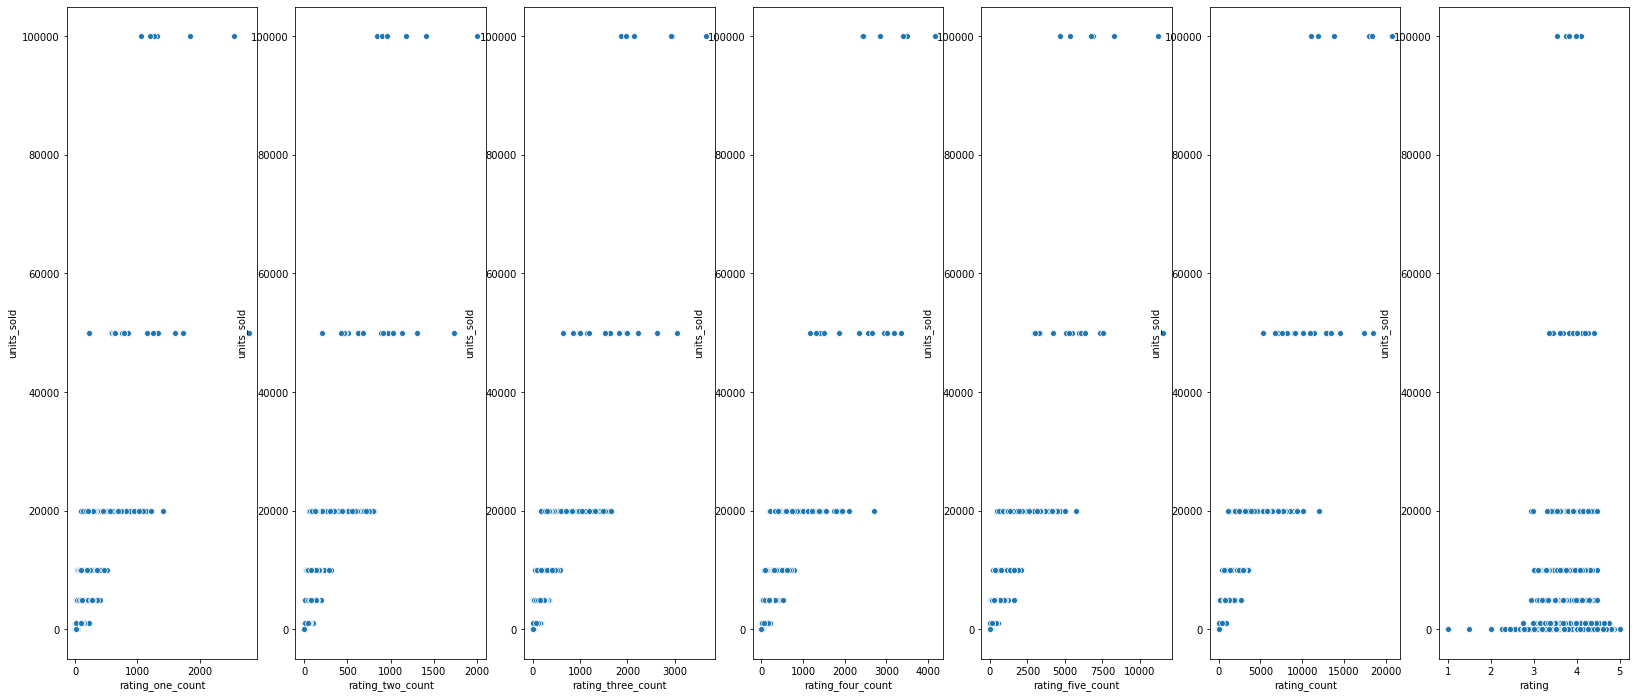

In [30]:
plt.figure(figsize = (28,12)),
ax = plt.subplot(1,7,1)
sns.scatterplot(x="rating_one_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,2)
sns.scatterplot(x="rating_two_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,3)
sns.scatterplot(x="rating_three_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,4)
sns.scatterplot(x="rating_four_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,5)
sns.scatterplot(x="rating_five_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,6)
sns.scatterplot(x="rating_count", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,7,7)
sns.scatterplot(x="rating", y="units_sold", data=df, ax= ax);

In [31]:
df1 = pd.DataFrame(df, columns = ['rating', 'rating_count','rating_five_count','rating_four_count','rating_three_count','rating_two_count',
                                 'rating_one_count','units_sold'])

In [32]:
fig = px.scatter(df1, x="rating", y="units_sold",color="rating_count",
                 size='units_sold')
fig.show()

In [33]:
df1.corr()

rating  rating_count  rating_five_count  \
rating              1.000000      0.043586           0.092078   
rating_count        0.043586      1.000000           0.982780   
rating_five_count   0.092078      0.982780           1.000000   
rating_four_count   0.053182      0.995927           0.980538   
rating_three_count -0.000068      0.981152           0.930847   
rating_two_count   -0.042579      0.944917           0.870344   
rating_one_count   -0.082028      0.909675           0.824609   
units_sold          0.026177      0.898844           0.875780   

                    rating_four_count  rating_three_count  rating_two_count  \
rating                       0.053182           -0.000068         -0.042579   
rating_count                 0.995927            0.981152          0.944917   
rating_five_count            0.980538            0.930847          0.870344   
rating_four_count            1.000000            0.976235          0.932100   
rating_three_count           0.976235            1.000000          0.984615   
rating_two_count             0.932100            0.984615          1.000000   
rating_one_count             0.890413            0.951803          0.983163   
units_sold                   0.891362            0.893082          0.865060   

                    rating_one_count  units_sold  
rating                     -0.082028    0.026177  
rating_count                0.909675    0.898844  
rating_five_count           0.824609    0.875780  
rating_four_count           0.890413    0.891362  
rating_three_count          0.951803    0.893082  
rating_two_count            0.983163    0.865060  
rating_one_count            1.000000    0.832029  
units_sold                  0.832029    1.000000

<font color=red> All five rating counts and total rating counts are important for units_sold. However, all five rating counts and total rating counts are highly correlated, thus I will only keep rating, rating_count.</font> 

In [34]:
fig = px.scatter(df, x="rating_count", y="price",color="units_sold",
                 size='units_sold')
fig.show()

In [35]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1341.000000
mean        8.458218
std         3.977299
min         1.000000
25%         5.850000
50%         8.000000
75%        11.000000
85%        12.000000
90%        14.000000
100%       49.000000
max        49.000000
Name: price, dtype: float64


<font color=red> Products with high rating counts together with product prices lower than 10 have the highest sales.</font> 

In [36]:
df["discount"] = df["retail_price"]-df["price"]

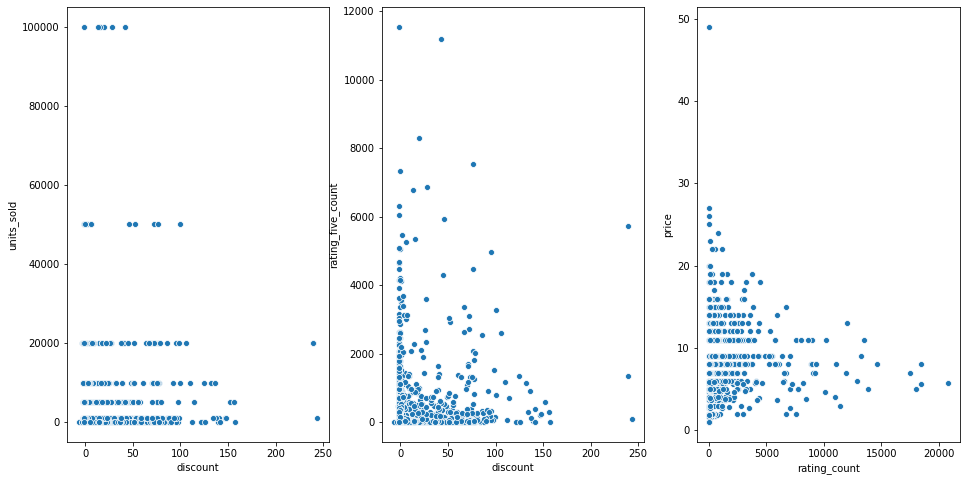

In [37]:
plt.figure(figsize = (16,8)),
ax = plt.subplot(1,3,1)
sns.scatterplot(x="discount", y="units_sold", data=df, ax= ax);
ax = plt.subplot(1,3,2)
sns.scatterplot(x="discount", y="rating_five_count", data=df, ax= ax);
ax = plt.subplot(1,3,3)
sns.scatterplot(x="rating_count", y="price", data=df, ax= ax);

<font color=red> It's surprising to note that discount is not an important factor for high sales or good ratings. </font>

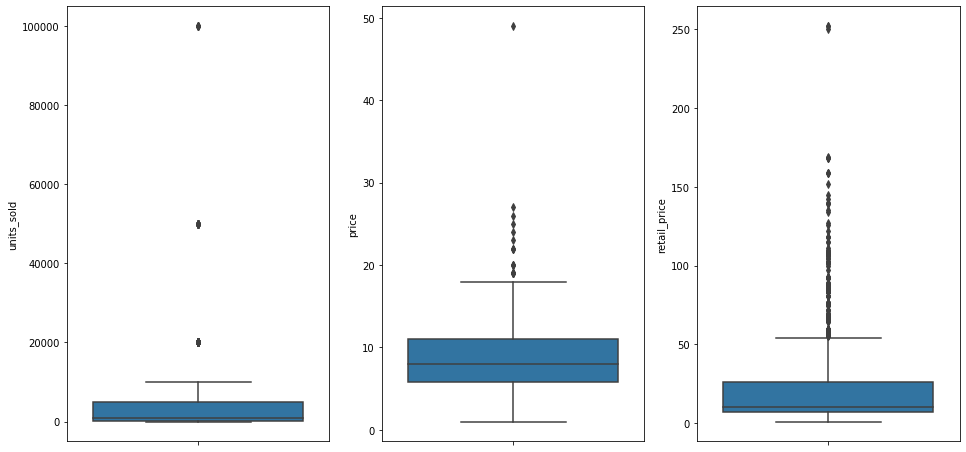

In [38]:
#check outliers
plt.figure(figsize = (16,8)),
ax = plt.subplot(1,3,1)
sns.boxplot(y = df.units_sold, ax= ax);
ax = plt.subplot(1,3,2)
sns.boxplot(y = df.price, ax= ax);
ax = plt.subplot(1,3,3)
sns.boxplot(y = df.retail_price, ax= ax);


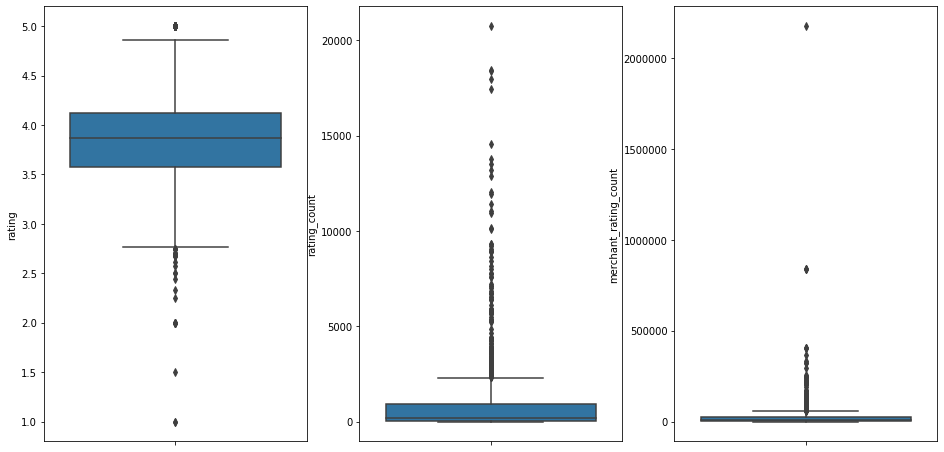

In [39]:
plt.figure(figsize = (16,8)),
ax = plt.subplot(1,3,1)
sns.boxplot(y = df.rating, ax= ax);
ax = plt.subplot(1,3,2)
sns.boxplot(y = df.rating_count, ax= ax);
ax = plt.subplot(1,3,3)
sns.boxplot(y = df.merchant_rating_count, ax= ax);

In [40]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [41]:
out_iqr(df,'units_sold')

The IQR is 4900.0
The lower bound value is -7250.0
The upper bound value is 12350.0
Total number of outliers are 122


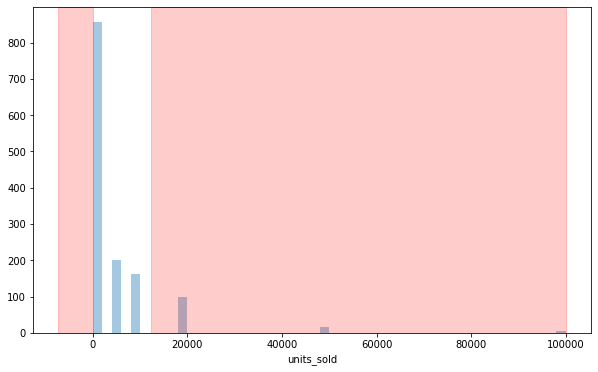

In [42]:
plt.figure(figsize = (10,6))
sns.distplot(df.units_sold, kde=False)
plt.axvspan(xmin = lower,xmax= df.units_sold.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.units_sold.max(),alpha=0.2, color='red')

<font color=red> I am not going to remove the outliers because they appear to have the correct inputs and contain true sales information.
    I will use Mean Absolute Value as the final metric and later it's very important to scale the data. </font>

In [43]:
def replace_name(a,b):
   df.origin_country.replace(a,b,inplace=True)

replace_name( 'CN',"China" )
replace_name( "US","United States of America" )
replace_name( "unknown","unknown" )
replace_name("VE","Venezuela" )
replace_name( 'GB',"Great Britain" )
replace_name( 'SG',"Singapore" )
replace_name( 'AT',"Austria" )

In [44]:
labels = df.origin_country.value_counts(normalize=True).index.values
values  = df.origin_country.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Product origin country", legend_title="Country names", template="plotly_dark")

In [45]:
df[df.origin_country=="China"]['price'].describe()

count    1307.000000
mean        8.444966
std         3.989377
min         1.000000
25%         5.840000
50%         8.000000
75%        11.000000
max        49.000000
Name: price, dtype: float64

<font color=red> About 75% of products coming from China are under 11 euros.</font>

In [46]:
color_data=df['product_color'].value_counts().loc[lambda x : x>10]
color_data

black         304
white         206
blue           84
pink           84
yellow         80
red            78
green          77
grey           65
purple         49
navyblue       25
orange         24
armygreen      24
winered        23
multicolor     18
beige          14
khaki          11
Name: product_color, dtype: int64

In [47]:
labels = color_data.index.values
values  =color_data.value_counts().values
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))
fig.update_layout(title="Product color", legend_title="Colors", template="plotly_dark")
fig

<font color=red> Black and white are most popular colors.</font>

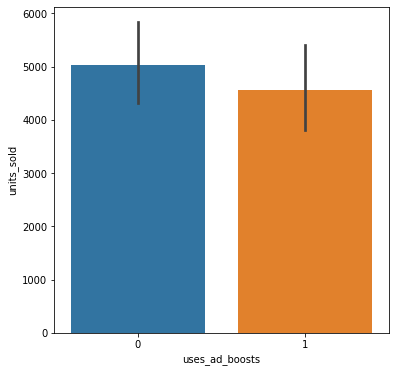

In [48]:
plt.figure(figsize = (6,6)),
sns.barplot(x='uses_ad_boosts',y='units_sold',data=df) 

<font color=red> Interestingly, sellers without using the ad boosts have higher sales.</font>

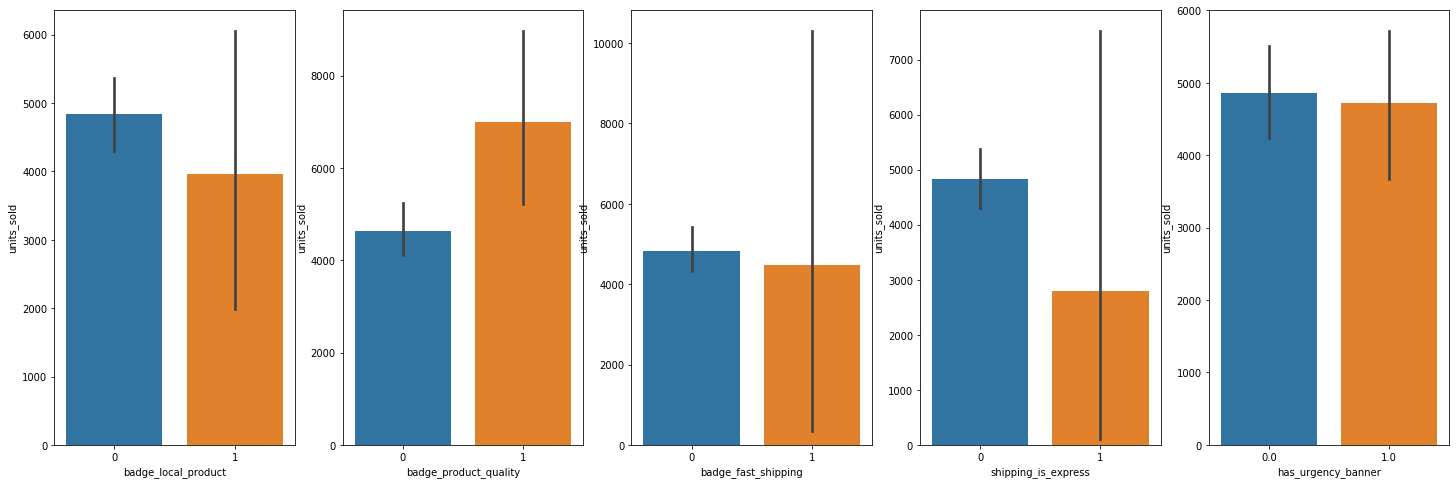

In [49]:
plt.figure(figsize = (25,8)),
ax = plt.subplot(1,5,1)
sns.barplot(x='badge_local_product',y='units_sold',data=df,ax= ax);
ax = plt.subplot(1,5,2)
sns.barplot(x='badge_product_quality',y='units_sold',data=df,ax= ax);
ax = plt.subplot(1,5,3)
sns.barplot(x='badge_fast_shipping',y='units_sold',data=df,ax= ax);
ax = plt.subplot(1,5,4)
sns.barplot(x='shipping_is_express',y='units_sold',data=df,ax= ax);
ax = plt.subplot(1,5,5)
sns.barplot(x='has_urgency_banner',y='units_sold',data=df,ax= ax);

<font color=red> Sellers with a product quality badge have higher sales.
Sellers without an urgency banner, express shipping, local product, fast shipping badges have higher sales.</font>

In [50]:
prices_by_country = df[['price','discount','retail_price','origin_country']].groupby('origin_country').mean()

In [51]:
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.price, name="Price"))
fig.add_trace(go.Scatter(x=prices_by_country.index.values, y=prices_by_country.discount, name="Discount"))
fig.add_trace(go.Bar(x=prices_by_country.index.values, y=prices_by_country.retail_price, name="Retail Price"))
fig.update_layout(title="Prices Categories By Country", xaxis_title="Countries", yaxis_title="Discount", template="plotly_dark", legend_title="Legend")

<font color=red> U.S. products have highest discount.</font>

In [52]:
df['shipping_option_name'].value_counts()

Livraison standard         1285
Standard Shipping            18
Envio Padrão                  8
Expediere Standard            4
Envío normal                  4
Standardversand               3
الشحن القياسي                 3
Livraison Express             3
Standardowa wysyłka           3
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           2
การส่งสินค้ามาตรฐาน           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

In [53]:
livrasion_prices = df[ df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().index.values
livrasion_prices_frquency =  df[df.shipping_option_name =='Livraison standard']['shipping_option_price'].value_counts().values

fig = go.Figure()
fig.add_trace(go.Pie(labels=livrasion_prices, values=livrasion_prices_frquency))
fig.update_layout(title="Livrasion Standard Prices", legend_title="Prices In Euros", template="plotly_dark")

<font color=red> Livraison Standard is a quite popular option for shipping and most customers choose shipping options from 1-3 euros.</font>

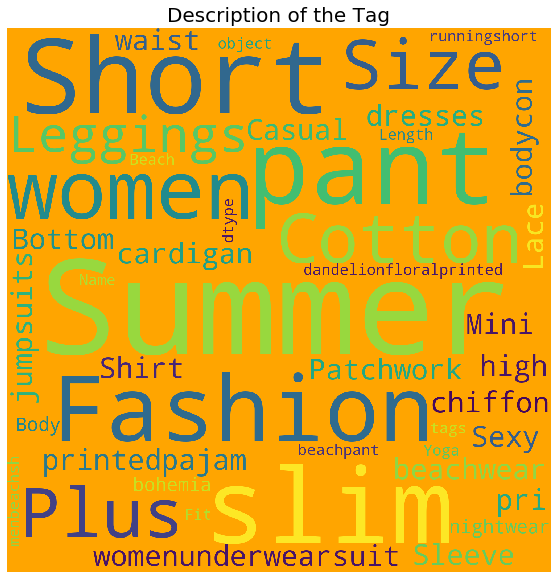

In [54]:
# description of the tags
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(df['tags']))
plt.title('Description of the Tag', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

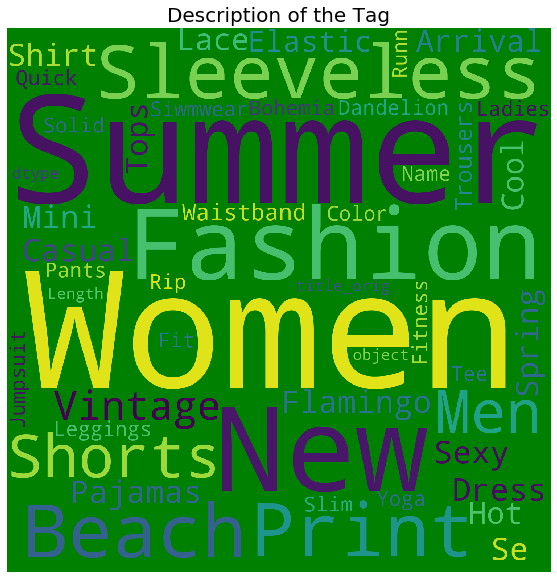

In [55]:
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')

wc = WordCloud(background_color = 'green', width = 1500, height = 1500).generate(str(df['title_orig']))
plt.title('Description of the Tag', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

<font color=red> Add a tag_count column to the dataframe.

In [56]:
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
df['tag_count'] = df['tags'].apply(tag_count)

In [57]:
df.head(2)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress    8.0            22   

   units_sold  uses_ad_boosts  rating  rating_count  rating_five_count  \
0         100               0    3.76            54               26.0   
1       20000               1    3.45          6135             2269.0   

   rating_four_count  ...  merchant_rating_count  merchant_rating  \
0                8.0  ...                    568         4.128521   
1             1027.0  ...                  17752         3.899673   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   

   merchant_profile_picture                                      product_url  \
0                   unknown  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                   unknown  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   

                 product_id discount tag_count  
0  5e9ae51d43d6a96e303acdb0     -2.0        24  
1  58940d436a0d3d5da4e95a38     14.0        15  

[2 rows x 42 columns]

<font color=red> Explore product

In [58]:
product_cat_columns =  df.loc[:, df.columns.str.startswith("product")].columns.values

In [59]:
df[product_cat_columns].head()
df.drop(['product_picture','product_url'], inplace=True, axis=1)

In [60]:
df_products =  df[['tags', 'price','discount','uses_ad_boosts', 'units_sold', 'rating','rating_count', 'product_id','badges_count', 'badge_product_quality','merchant_rating']].copy().sort_values(['units_sold','badges_count'], ascending=False)
products_by_id =  df_products.set_index('product_id')

<font color=red> The top 6 products sold units are 100k, while others are at 50k, so that's a massive difference.

In [61]:
# Top 10 products sold for women
df_products.loc[df_products.tags.str.contains('[Ww]omen')].head(10).index

Int64Index([17, 90, 208, 243, 920, 1042, 40, 83, 868, 1266], dtype='int64')

In [62]:
# Top 10 products in general
df_products.head(10).index 

Int64Index([17, 90, 208, 243, 920, 1042, 40, 83, 868, 1266], dtype='int64')

<font color=red> The index is same for both in general and women products, so top buyers are women or people shopping for ladiesware products in Wish.</font>

<font color=red>A list of top 10 items </font>

In [63]:
df[['title', 'units_sold','price','product_color','origin_country','rating','rating_count','merchant_rating_count']].sort_values(by = 'units_sold',
                                                ascending = False).head(10)

title  units_sold  price  \
243   T-shirt à manches courtes en mousseline de soi...      100000   5.00   
90    Femmes Camisole extensible Spaghetti Strap Lon...      100000   5.77   
1042  Nouvelle arrivée femmes été sexy robe de soiré...      100000   5.67   
208   Nouveau Aeeival Femmes Vêtements À Manches Lon...      100000   8.00   
17    2018 New Fashion Women's Tops Sexy Strappy Sle...      100000   5.00   
920   Femmes dentelle manches courtes hauts hauts ch...      100000   7.00   
863   Hot Dernières Sexy Bikini Sexy Bikini Femmes M...       50000   9.00   
1266  Summer Women Sexy White Broderie Sexy White De...       50000   8.00   
473   Fashion Women Back Deep V V Sexy Gilet sans do...       50000   7.00   
40    Sexy Women Casual T-shirt rayé Long Tops Chemi...       50000   9.00   

     product_color origin_country  rating  rating_count  merchant_rating_count  
243         orange          China    3.98         13789                 366898  
90           black          China    4.10         20744                 330405  
1042          grey          China    3.53         18393                  19248  
208    light green          China    3.76         11062                 108048  
17           white          China    3.83         17980                 139223  
920          black          China    3.82         11913                 320031  
863         yellow          China    3.83         13198                  37076  
1266         black          China    3.60         18463                  51369  
473           gray          China    3.35          9075                 839882  
40           black          China    4.26          5359                  59198

In [64]:
scaler = MinMaxScaler()
plot_data = products_by_id.copy()
plot_data.iloc[:,1:] = scaler.fit_transform(plot_data.iloc[:,1:])
fig = go.Figure()
fig.add_trace(go.Bar(x=plot_data.head(10).index.values,y=plot_data.head(10).units_sold,name="Units Sold"  ))
fig.add_trace(go.Scatter(x=plot_data.head(10).index.values,y=plot_data.head(10).price, mode="lines+markers", name="Price" ))
fig.add_trace(go.Scatter(x=plot_data.head(10).index.values,y=plot_data.head(10).rating_count,mode="lines+markers",name="Product rating counts"  ))
fig.add_trace(go.Scatter(x=plot_data.head(10).index.values,y=plot_data.head(10).rating,mode="lines+markers",name="Product rating"  ))
fig.add_trace(go.Scatter(x=plot_data.head(10).index.values,y=plot_data.head(10).merchant_rating,mode="lines+markers",name="Merchant rating"  ))

fig.update_layout(title="Top 10 Products Sold", legend_title="Features")

<font color=red> Check correlation between unit_sold and 3 categorical variables.

In [65]:
#use one hot encoding to change categorical variables to dummy variable
dummies_color = pd.get_dummies(df['product_color'], drop_first=True)
dummies_variation = pd.get_dummies(df['product_variation_size_id'])
dummies_origin = pd.get_dummies(df['origin_country'])

In [66]:
feat_onehot = pd.concat([dummies_color, dummies_variation, dummies_origin, df['units_sold']], axis=1)
feat_onehot.head(1)

Black  Blue  Pink  RED  Rose red  White  applegreen  apricot  army  \
0      0     0     0    0         0      0           0        0     0   

   army green  ...  pants-S  s  size S  Austria  China  Great Britain  \
0           0  ...        0  0       0        0      1              0   

   Singapore  United States of America  Venezuela  units_sold  
0          0                         0          0         100  

[1 rows x 213 columns]

In [67]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [196]:
feat_onehot_corr = feat_onehot.corr()

feat_onehot_corr['units_sold'].sort_values(ascending=False).head(6)

units_sold          1.000000
light green         0.261474
wine red            0.124115
3 layered anklet    0.124115
M                   0.100821
S                   0.083199
Name: units_sold, dtype: float64

In [69]:
df.drop(labels = ['product_color', 'product_variation_size_id', 'origin_country'], 
           axis=1, 
           inplace=True)

<font color=red>The correlations between units_sold and 3 categorical variables, color, size, origin country are not very high, those will not be considered in the model. From the EDA, drop some other unimportant variables. </font>

In [70]:
df.drop(labels = ['tags','title', 'title_orig', 'urgency_text', 'merchant_title',
                  'merchant_name','merchant_info_subtitle','merchant_id',
                 'product_id','merchant_profile_picture',
                  'shipping_option_name','rating_five_count',
                  'rating_four_count','rating_three_count',
            'rating_two_count','rating_one_count','discount'], axis=1, inplace=True)

In [71]:
df.head(2)


price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0  16.0   14            100         0               3.76    54             
1  8.0    22            20000       1               3.45    6135           

   badges_count  badge_local_product  badge_product_quality  \
0  0             0                    0                       
1  0             0                    0                       

   badge_fast_shipping  product_variation_inventory  shipping_option_price  \
0  0                    50                           4                       
1  0                    50                           2                       

   shipping_is_express  countries_shipped_to  inventory_total  \
0  0                    34                    50                
1  0                    41                    50                

   has_urgency_banner  merchant_rating_count  merchant_rating  \
0  1.0                 568                    4.128521          
1  1.0                 17752                  3.899673          

   merchant_has_profile_picture  tag_count  
0  0                             24         
1  0                             15

<font color=red>Data is ready for modeling

## Modeling
<a id='modeling'></a>

### Linear Regression
<a id='lr'></a>

In [72]:
y=df.pop('units_sold')
X=df

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [74]:
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [77]:
print(f'R squared: {metrics.r2_score(y_test,y_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R squared: 0.7407746751265825
Mean absolute error: 1880.5793338710196
Root mean squared error: 3349.5393550247322


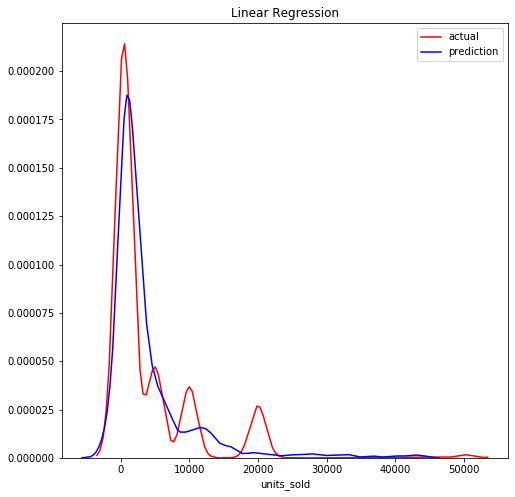

In [78]:
# Visualize the predictions (in blue) against the actual values (in red)
plt.figure(figsize = (8,8)),
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Linear Regression')

### Feature Selection
<a id='feature_selection'></a>

#### Backward Elimination
<a id='back'></a>

In [79]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()

In [80]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['retail_price', 'uses_ad_boosts', 'rating_count', 'badge_fast_shipping', 'merchant_rating_count', 'tag_count']


In [81]:
X_backward_elimination = X[['retail_price', 'uses_ad_boosts', 'rating_count', 'badge_fast_shipping', 'merchant_rating_count', 'tag_count']]

In [82]:
#refit the model using variables selected by backward elimination
X_2 = sm.add_constant(X_backward_elimination)
#Fitting sm.OLS model
model = sm.OLS(y,X_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             units_sold   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     974.2
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:16:13   Log-Likelihood:                -13118.
No. Observations:                1341   AIC:                         2.625e+04
Df Residuals:                    1334   BIC:                         2.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -532.9078    544.792     -0.978      0.328   -1601.650     535.834
retail_price            -12.5072      3.859     -3.241      0.001     -20.077      -4.937
uses_ad_boosts          528.6743    238.467      2.217      0.027      60.864     996.485
rating_count              4.2449      0.058     72.779      0.000       4.131       4.359
badge_fast_shipping   -3510.3594    997.118     -3.521      0.000   -5466.449   -1554.270
merchant_rating_count     0.0051      0.001      3.477      0.001       0.002       0.008
tag_count                66.1884     28.515      2.321      0.020      10.250     122.127
==============================================================================
Omnibus:                      976.295   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86630.591
Skew:                           2.630   Prob(JB):                         0.00
Kurtosis:                      42.023   Cond. No.                     7.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Recursive Feature Elimination
<a id='rfe'></a>

In [83]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = XGBRegressor()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.806528


In [85]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 9)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['uses_ad_boosts', 'rating', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'shipping_option_price',
       'shipping_is_express', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')


#### LassoCV
<a id='lassocv'></a>

In [86]:
from sklearn.linear_model import LassoCV
reg = LassoCV(random_state=random_seed)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 226769.815909
Best score using built-in LassoCV: 0.809462
Lasso picked 2 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

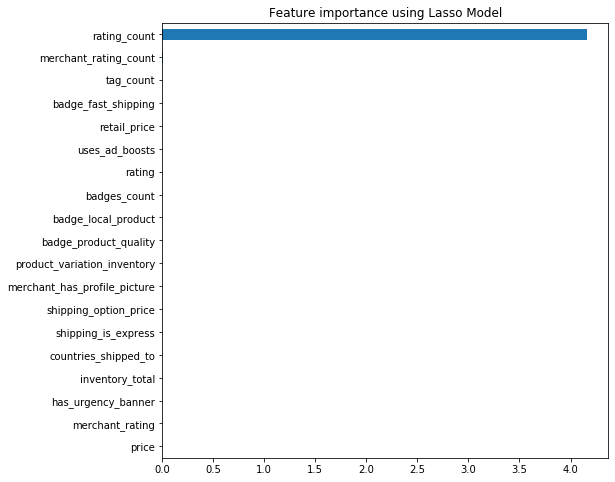

In [87]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8,8)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Linear Regression with Regularization
<a id='lr_reg'></a>

#### Ridge Regression
<a id='ridge'></a>

In [88]:
#ridge
Ridge = linear_model.Ridge(random_state=random_seed)
Ridge.fit(X_train,y_train)
ridge_pred= Ridge.predict(X_test)

In [89]:
print(f'R squared: {metrics.r2_score(y_test,ridge_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,ridge_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,ridge_pred))}')

R squared: 0.7527332442215355
Mean absolute error: 1921.259465123448
Root mean squared error: 3271.3667598605048


In [90]:
params_Ridge = {'alpha': np.array([0.01,0.1,1,5,10,15,20,25,30,35,40,45,50])}

In [91]:
Ridge_GS = GridSearchCV(Ridge, param_grid=params_Ridge)
Ridge_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=748,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.0e-02, 1.0e-01, 1.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       2.5e+01, 3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
Ridge_GS.best_params_

{'alpha': 1.0}

In [93]:
pred_Ridge_GS = Ridge_GS.predict(X_test)

In [94]:
print(f'R squared: {metrics.r2_score(y_test,pred_Ridge_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_Ridge_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_Ridge_GS))}')

R squared: 0.7527332442215355
Mean absolute error: 1921.259465123448
Root mean squared error: 3271.3667598605048


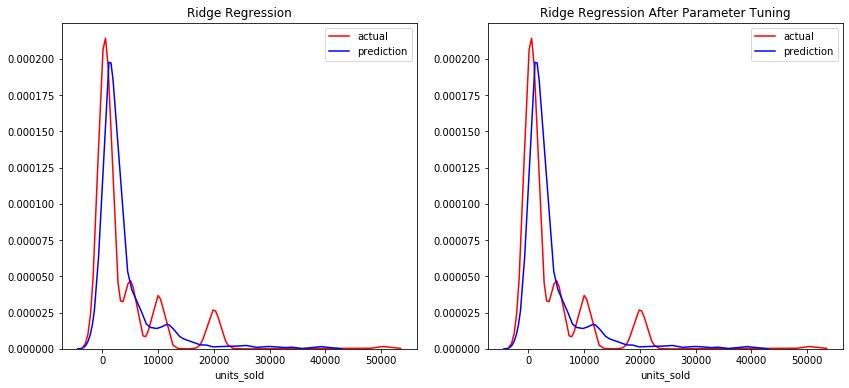

In [95]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(ridge_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Ridge Regression');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_Ridge_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Ridge Regression After Parameter Tuning');

#### Lasso Regression
<a id='lasso'></a>

In [96]:
Lasso = linear_model.Lasso(alpha=0.01, random_state=random_seed)
Lasso.fit(X_train,y_train)
lasso_pred = Lasso.predict(X_test)

In [97]:
print(f'R squared: {metrics.r2_score(y_test,lasso_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,lasso_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,lasso_pred))}')

R squared: 0.7407845545426202
Mean absolute error: 1880.4537597246633
Root mean squared error: 3349.475526754607


In [98]:
params_Lasso = {'alpha': np.array([0.01,0.1,1,5,10,15,20,25,30,35,40,45,50,60,70,80,100])}
Lasso_GS = GridSearchCV(Lasso, param_grid=params_Lasso)
Lasso_GS.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=748,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.0e-02, 1.0e-01, 1.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01,
       2.5e+01, 3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01, 5.0e+01, 6.0e+01,
       7.0e+01, 8.0e+01, 1.0e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
Lasso_GS.best_params_

{'alpha': 80.0}

In [100]:
pred_Lasso_GS = Lasso_GS.predict(X_test)

In [101]:
print(f'R squared: {metrics.r2_score(y_test,pred_Lasso_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_Lasso_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_Lasso_GS))}')

R squared: 0.7419951652208855
Mean absolute error: 1888.998489653129
Root mean squared error: 3341.6448662013


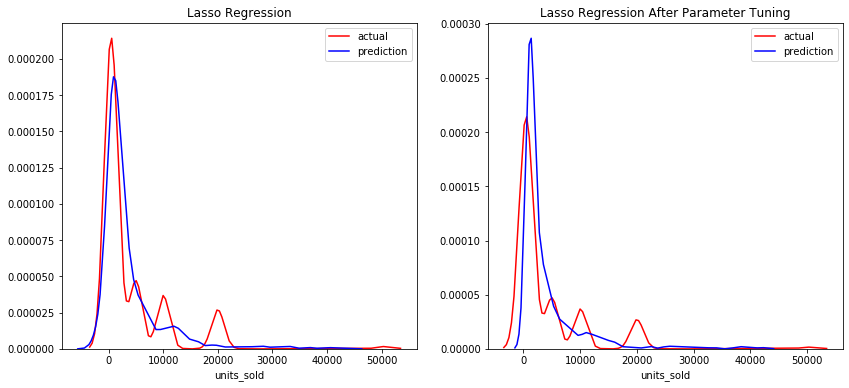

In [102]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(lasso_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Lasso Regression');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_Lasso_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Lasso Regression After Parameter Tuning');

#### Elastic Net
<a id='en'></a>

In [103]:
EN = linear_model.ElasticNet(random_state=random_seed)
EN.fit(X_train,y_train)
pred_EN = EN.predict(X_test)

In [104]:
print(f'R squared: {metrics.r2_score(y_test,pred_EN)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_EN)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_EN))}')

R squared: 0.023843934531344257
Mean absolute error: 4966.325378318801
Root mean squared error: 6499.889891313932


In [105]:
params_EN_RS = {'alpha':np.array([0.0001,0.001,0.01,0.1,1,5,10,15,20,25,30,35,40,45,50]),
               'l1_ratio':uniform(0.0001,1) }

In [106]:
EN_RS = RandomizedSearchCV(linear_model.ElasticNet(), param_distributions=params_EN_RS,n_iter=100)
EN_RS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': array([1.0e-04, 1.0e-03, 1.0e-02, 1.0e-01, 1.0e+00, 5.0e+00, 1.0e+01,
       1.5e+01, 2.0e+01, 2.5e+01, 3.0e+01, 3.5e+01, 4.0e+01, 4.5e+01,
       5.0e+01]),
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CDD921EC48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_scor

In [107]:
EN_RS.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1238225278534092}

In [108]:
pred_EN_RS = EN_RS.predict(X_test)

In [109]:
print(f'R squared: {metrics.r2_score(y_test,pred_EN_RS )}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_EN_RS )}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_EN_RS ))}')

R squared: 0.7518361004832927
Mean absolute error: 1907.7716806951637
Root mean squared error: 3277.2960423750174


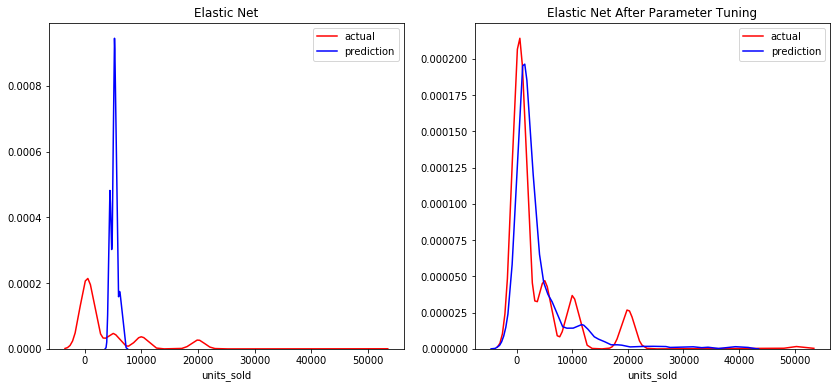

In [110]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_EN, hist=False, color='b',label='prediction', ax=ax1).set_title('Elastic Net');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_EN_RS, hist=False, color='b',label='prediction', ax=ax2).set_title('Elastic Net After Parameter Tuning');

### K Nearest Neighbours
<a id='knn'></a>

In [113]:
knnr = KNeighborsRegressor()
knnr.fit(X_train,y_train)
pred_knnr = knnr.predict(X_test)

In [114]:
print(f'R squared: {metrics.r2_score(y_test,pred_knnr)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_knnr)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_knnr))}')

R squared: 0.3231256248223675
Mean absolute error: 3558.7746898263026
Root mean squared error: 5412.531135889447


In [115]:
params_knn = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

In [116]:
model_knn1 = GridSearchCV(knnr, param_grid=params_knn)
model_knn1.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
model_knn1.best_params_

{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}

In [118]:
pred_knnr_GS = model_knn1.predict(X_test)

In [119]:
print(f'R squared: {metrics.r2_score(y_test,pred_knnr_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_knnr_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_knnr_GS))}')

R squared: 0.3341409782855932
Mean absolute error: 3492.156871961666
Root mean squared error: 5368.309116680741


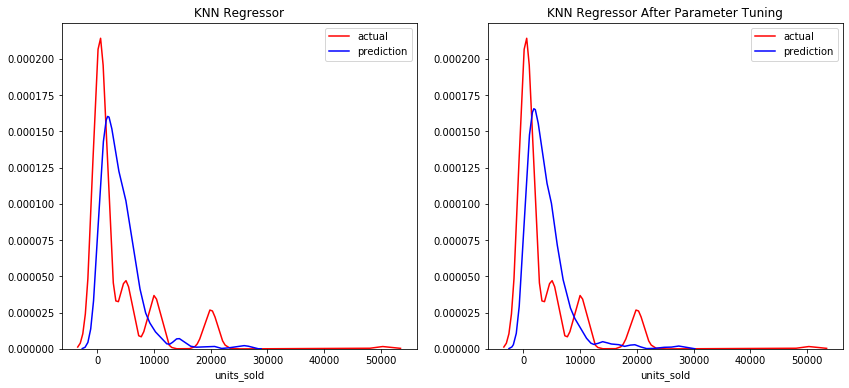

In [120]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_knnr, hist=False, color='b',label='prediction', ax=ax1).set_title('KNN Regressor');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_knnr_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('KNN Regressor After Parameter Tuning');

### Decision Tree
<a id='dt'></a>

In [121]:
DTR = DecisionTreeRegressor(max_depth=5,random_state=random_seed)
DTR.fit(X_train,y_train)
Pred_DTR = DTR.predict(X_test)

In [122]:
print(f'R squared: {metrics.r2_score(y_test,Pred_DTR)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,Pred_DTR)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,Pred_DTR))}')

R squared: 0.6551168081561172
Mean absolute error: 1703.2014863230224
Root mean squared error: 3863.5130696630936


In [123]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'max_depth':[2,3,4,5,6,7,8]}

In [124]:
DTR_GS = GridSearchCV(DTR, param_grid=params)
DTR_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=5,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=748,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
      

In [125]:
DTR_GS.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12}

In [126]:
pred_DTR_GS = DTR_GS.predict(X_test)

In [127]:
print(f'R squared: {metrics.r2_score(y_test,pred_DTR_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_DTR_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_DTR_GS))}')

R squared: 0.6487164968563067
Mean absolute error: 1732.021082035961
Root mean squared error: 3899.1976372486156


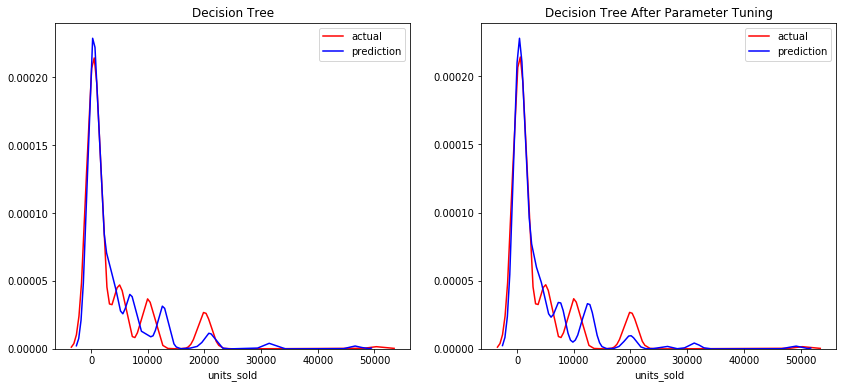

In [128]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(Pred_DTR, hist=False, color='b',label='prediction', ax=ax1).set_title('Decision Tree');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_DTR_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Decision Tree After Parameter Tuning');

### Bagging Regressor
<a id='bag'></a>

In [129]:
baggingR = BaggingRegressor(random_state=random_seed)
baggingR.fit(X_train,y_train)
bag_test_pred = baggingR.predict(X_test)

In [130]:
print(f'R squared: {metrics.r2_score(y_test,bag_test_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,bag_test_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,bag_test_pred))}')

R squared: 0.783879329462315
Mean absolute error: 1441.6719602977669
Root mean squared error: 3058.401685079199


In [131]:
params_bag_GS = {"n_estimators": [1,2,5,10],
              "max_features":[0.5,1],
              "max_samples": [0.1,0.5,1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

In [132]:
Bag_model_GS = GridSearchCV(baggingR, param_grid=params_bag_GS)
Bag_model_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=748,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1], 'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [1, 2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
Bag_model_GS.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 1}

In [134]:
pred_bag_GS = Bag_model_GS.predict(X_test)

In [135]:
print(f'R squared: {metrics.r2_score(y_test,pred_bag_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_bag_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_bag_GS))}')

R squared: 0.4110741291982446
Mean absolute error: 1868.6079404466502
Root mean squared error: 5048.6665475339705


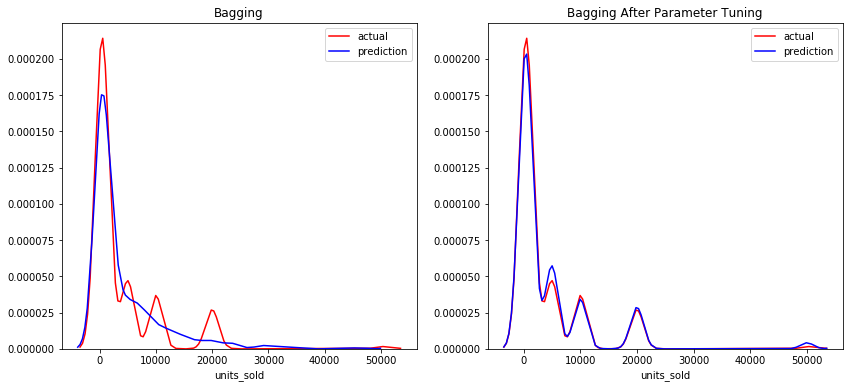

In [136]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(bag_test_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Bagging');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_bag_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Bagging After Parameter Tuning');

### Random Forest Regressor
<a id='rf'></a>

In [137]:
rfr = RandomForestRegressor(random_state=random_seed)
rfr.fit(X_train,y_train)
rfr_test_pred = rfr.predict(X_test)

In [138]:
print(f'R squared: {metrics.r2_score(y_test,rfr_test_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,rfr_test_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,rfr_test_pred))}')

R squared: 0.744117298640385
Mean absolute error: 1514.0277915632753
Root mean squared error: 3327.873692964855


In [139]:
params_RF = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}

In [140]:
model_RF_GS = GridSearchCV(rfr, param_grid=params_RF)
model_RF_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=748,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 6, 7, 8, 9]

In [141]:
model_RF_GS.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [142]:
pred_RF_GS = model_RF_GS.predict(X_test)

In [143]:
print(f'R squared: {metrics.r2_score(y_test,pred_RF_GS )}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_RF_GS )}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_RF_GS ))}')

R squared: 0.7420285761557199
Mean absolute error: 1478.948183614514
Root mean squared error: 3341.4284921676376


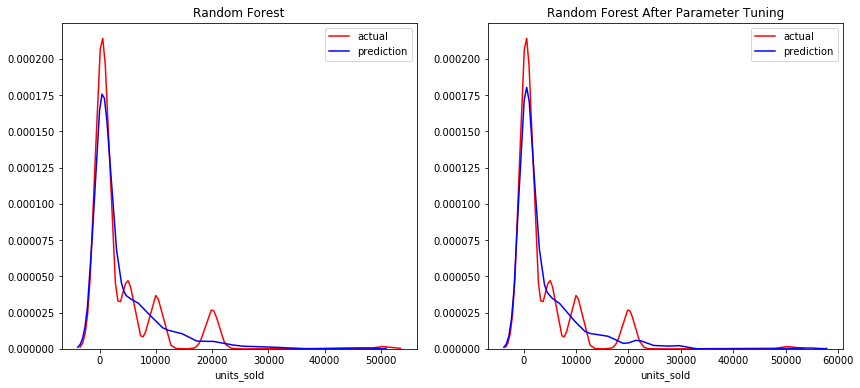

In [144]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(rfr_test_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Random Forest');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_RF_GS , hist=False, color='b',label='prediction', ax=ax2).set_title('Random Forest After Parameter Tuning');

### Boosting
<a id='boosting'></a>

#### Ada Boosting
<a id='ada'></a>

In [145]:
AdaBoost = AdaBoostRegressor(random_state=random_seed)
AdaBoost.fit(X_train,y_train)
AdaBoost_test_pred = AdaBoost.predict(X_test)

In [146]:
print(f'R squared: {metrics.r2_score(y_test,AdaBoost_test_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,AdaBoost_test_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,AdaBoost_test_pred))}')

R squared: 0.7434476620249267
Mean absolute error: 1900.9982293204002
Root mean squared error: 3332.2253158248254


In [147]:
params_AdbR_GS = {'learning_rate':[0.05,0.1,0.2,0.6,0.8,1],
        'n_estimators': [50,60,100],
                 'loss' : ['linear', 'square', 'exponential']}

In [148]:
model_AdaR_GS = GridSearchCV(AdaBoostRegressor(), param_grid=params_AdbR_GS)
model_AdaR_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.6, 0.8, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [149]:
model_AdaR_GS.best_params_

{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}

In [150]:
pred_AdaR_GS = model_AdaR_GS.predict(X_test)

In [151]:
print(f'R squared: {metrics.r2_score(y_test,pred_AdaR_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_AdaR_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_AdaR_GS))}')

R squared: 0.7819420389513302
Mean absolute error: 1652.5440334616505
Root mean squared error: 3072.0787523374706


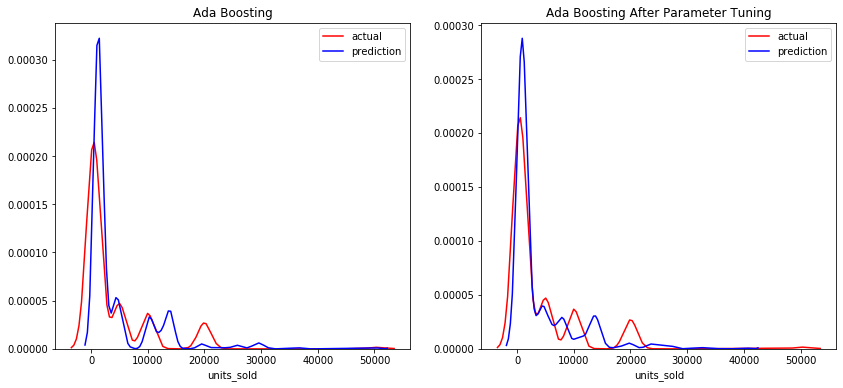

In [152]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(AdaBoost_test_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Ada Boosting');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_AdaR_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Ada Boosting After Parameter Tuning');

#### Gradient Boosting Regressor
<a id='gradient'></a>

In [153]:
GBR = GradientBoostingRegressor(random_state=random_seed)
GBR.fit(X_train,y_train)
GBR_test_pred = GBR.predict(X_test)

In [154]:
print(f'R squared: {metrics.r2_score(y_test,GBR_test_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,GBR_test_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,GBR_test_pred))}')

R squared: 0.8154045164823642
Mean absolute error: 1453.6941890196924
Root mean squared error: 2826.5515252061195


In [155]:
params_GBR_GS = {"max_depth": [3,5,6,7],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,30,50,70]}

In [156]:
model_GradR2_GS = GridSearchCV(GradientBoostingRegressor(), param_grid=params_GBR_GS)
model_GradR2_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...
                             

In [157]:
model_GradR2_GS.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 3,
 'n_estimators': 70}

In [158]:
pred_GradR_GS = model_GradR2_GS.predict(X_test)

In [159]:
print(f'R squared: {metrics.r2_score(y_test,pred_GradR_GS )}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_GradR_GS )}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_GradR_GS ))}')

R squared: 0.7410542980797139
Mean absolute error: 1870.2260356346994
Root mean squared error: 3347.7323155320305


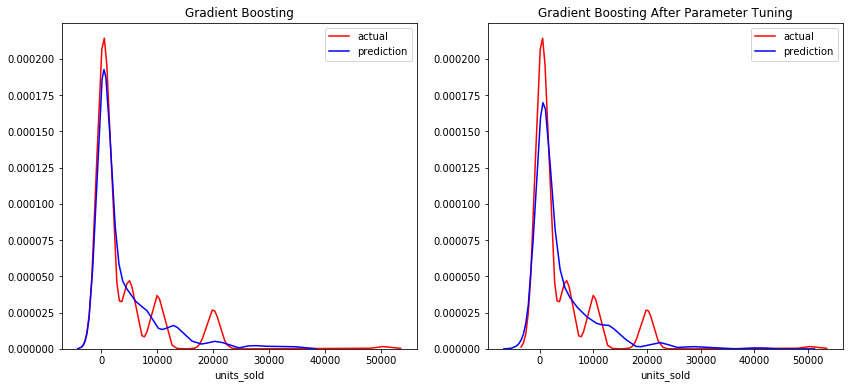

In [160]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(GBR_test_pred, hist=False, color='b',label='prediction', ax=ax1).set_title('Gradient Boosting');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_GradR_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('Gradient Boosting After Parameter Tuning');

#### XgBoost Regressor
<a id='xg'></a>

In [161]:
xgbr = XGBRegressor(random_state=random_seed)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=748, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [162]:
pred_xgbr = xgbr.predict(X_test)

In [163]:
print(f'R squared: {metrics.r2_score(y_test,pred_xgbr)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_xgbr )}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_xgbr ))}')

R squared: 0.7928210625591164
Mean absolute error: 1438.6439618981506
Root mean squared error: 2994.4645208387383


In [164]:
params_xgbR_GS = {"max_depth": [3,4,5,6,7,8],
              "min_child_weight" : [4,5,6,7,8],
            'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],
            'n_estimators': [10,30,50,70,80,100]}

In [165]:
model_xgbR_GS = GridSearchCV(XGBRegressor(), param_grid=params_xgbR_GS)
model_xgbR_GS.fit(X_train,y_train)

C:\Users\linli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_cons...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.25, 0

In [166]:
model_xgbR_GS.best_params_

{'learning_rate': 0.8,
 'max_depth': 4,
 'min_child_weight': 8,
 'n_estimators': 10}

In [167]:
pred_xgbR_GS = model_xgbR_GS.predict(X_test)

In [168]:
print(f'R squared: {metrics.r2_score(y_test,pred_xgbR_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_xgbR_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_xgbR_GS))}')

R squared: 0.716170765328751
Mean absolute error: 1632.1182805622186
Root mean squared error: 3504.8943733703945


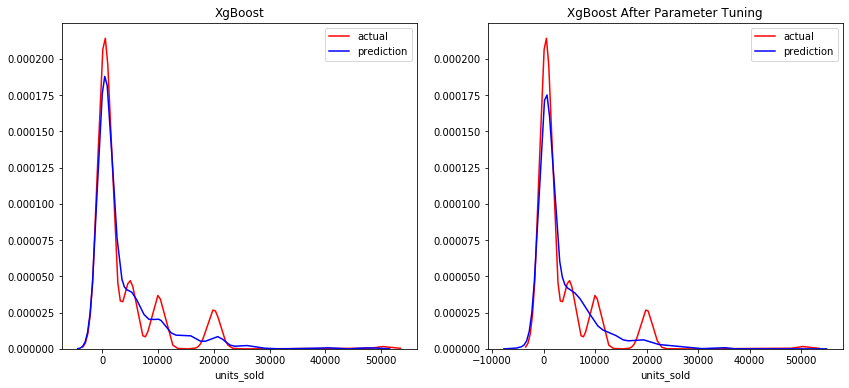

In [169]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_xgbr, hist=False, color='b',label='prediction', ax=ax1).set_title('XgBoost');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_xgbR_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('XgBoost After Parameter Tuning');

### Support Vector Machine Regression
<a id='svr'></a>

In [171]:
svr= SVR(C=1, cache_size=500, epsilon=1, kernel='linear')
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [172]:
print(f'R squared: {metrics.r2_score(y_test,pred_svr)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_svr)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_svr))}')

R squared: -0.19395542181694836
Mean absolute error: 3607.927972287188
Root mean squared error: 7188.535588480124


In [173]:
params_svr_GS ={"gamma" : ['auto', 'scale'],
                "C" : [0.1, 0.5, 1, 50, 100, 1000],
                "epsilon" : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [174]:
estimator = SVR(kernel='linear', gamma='auto')
svr_GS =  GridSearchCV(estimator, params_svr_GS)
svr_GS .fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 50, 100, 1000],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': ['auto', 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [175]:
svr_GS.best_params_

{'C': 1000, 'epsilon': 0.5, 'gamma': 'auto'}

In [176]:
pred_svr_GS = svr_GS.predict(X_test)

In [177]:
print(f'R squared: {metrics.r2_score(y_test,pred_svr_GS)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,pred_svr_GS)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,pred_svr_GS))}')

R squared: 0.5086393590512855
Mean absolute error: 2304.6470583742694
Root mean squared error: 4611.546094222575


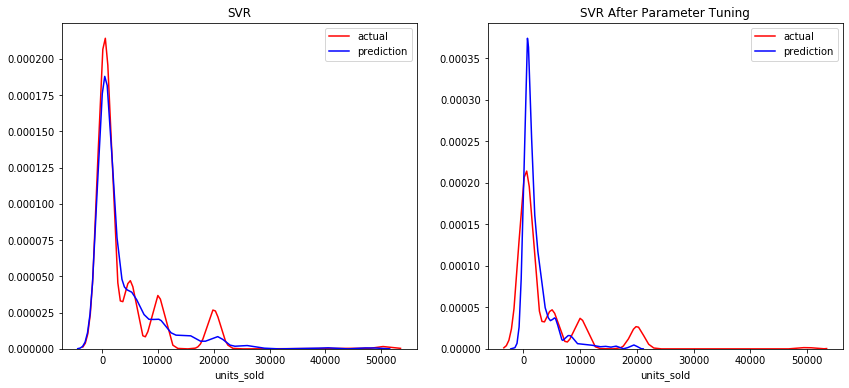

In [178]:
plt.figure(figsize = (14,6)),
ax1 = plt.subplot(1,2,1)
sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_xgbr, hist=False, color='b',label='prediction', ax=ax1).set_title('SVR');

ax2 = plt.subplot(1,2,2)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(pred_svr_GS, hist=False, color='b',label='prediction', ax=ax2).set_title('SVR After Parameter Tuning');

Text(0.5, 1.0, 'Mean absolute errors for different regressors in ascending order')

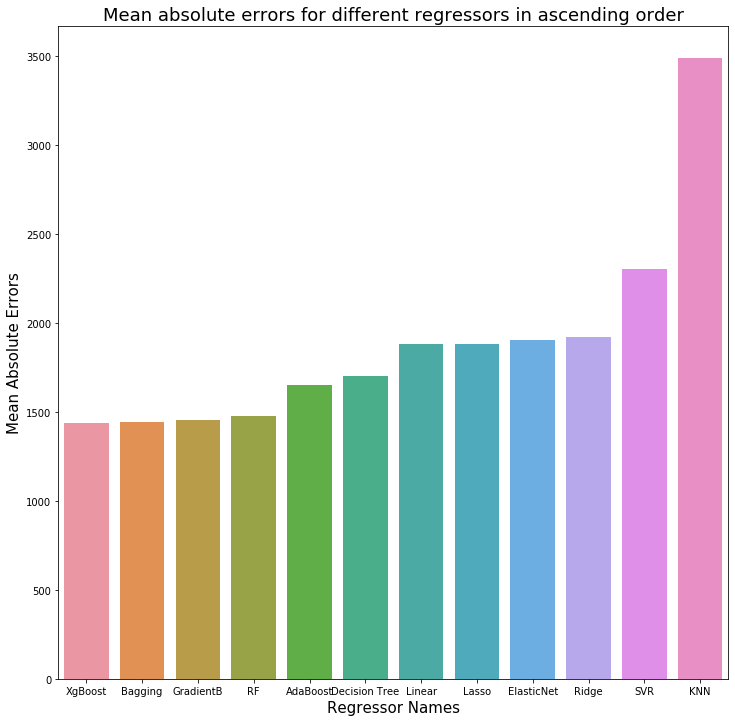

In [187]:
Regressors=['Linear','Ridge','Lasso','ElasticNet','KNN','Decision Tree','Bagging','RF','AdaBoost','GradientB','XgBoost','SVR']
mae=[1881,1921,1881,1907,3492,1703,1442,1478,1653,1454,1438,2305]
df = pd.DataFrame({"Regressors":Regressors,
                  "Mean Absolute Errors":mae})
plt.figure(figsize=(12,12))
# make barplot and sort bars
sns.barplot(x='Regressors',
            y="Mean Absolute Errors", 
            data=df, 
            order=df.sort_values('Mean Absolute Errors').Regressors)
# set labels
plt.xlabel("Regressor Names", size=15)
plt.ylabel("Mean Absolute Errors", size=15)
plt.title("Mean absolute errors for different regressors in ascending order", size=18)

### Stacking Regressor
<a id='stacking'></a>

In [192]:
mod1 = XGBRegressor(random_state=random_seed)
mod2 = BaggingRegressor(random_state=random_seed)
mod3 = GradientBoostingRegressor(random_state=random_seed)
mod4 = RandomForestRegressor(random_state=random_seed)
mod5 = XGBRegressor(random_state=random_seed)

In [193]:
sr = StackingRegressor(regressors=[mod1, mod2,mod3,mod4,mod5], 
                          meta_regressor=mod5)

In [194]:
sr.fit(X_train,y_train)
sr_pred = sr.predict(X_test)

In [195]:
print(f'R squared: {metrics.r2_score(y_test,sr_pred)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,sr_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test,sr_pred))}')

R squared: 0.7532277122081105
Mean absolute error: 1139.992360454635
Root mean squared error: 3268.0941896650174


## Conclusion
<a id='con'></a>

**Some interesting findings from the dataset:**<br>
1.	Rating_count and merchant_rating_count are the two most significant predictors for units_sold.<br>
2.	Stacking Regressor with four combined regressors XgBoost, Bagging, Gradient Boosting, Random Forest is the best model for predicting the units_sold, the mean absolute error is 1140 units.<br>
3.	Top buyers are ladies or those shop for ladies’ products in Wish.<br>
4.	U.S. products have highest discount.<br>
5.	Discount is not an important factor for high sales or good rating.<br>
6.	75% of products come from China and prices are under 11 euros.<br>
7.	Sellers without using the ad boosts have higher sales.<br>
8.	Sellers with product quality badge has higher sales. Sellers without urgency banner, express shipping, local product, fast shipping badges have higher sales.<br>
9.	Livraison Standard is quite popular option for shipping and most customers choose shipping options from 1-3 euros.<br>
10.	The top 6 products have 100k units sold, while others are at 50k, so that's a massive difference.<br>
11.	Correlation between units_sold and product color, size, country of origin is not very high.<br>